In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

from ya_cup_2022.scoring import (
    analyze_predictions,
    miss_rank_error_decompose,
)

%matplotlib inline

In [2]:
ANS_FN = '_ans_xxl'
# PRED_FN = '_pred_xxl_als_f1000_a100_r10_@300'
# PRED_FN = '_pred_xxl_wfm_r_xxl_train_only_1000_5_@300'
# PRED_FN = '_pred_xxl_wfm_r_xxl_train_only_100_3_@300'
# PRED_FN = '_pred_xxl_wfm_n_xxl_train_only_100_3_@100'
# PRED_FN = '_pred_xxl_wfm_xxl_train_only_100_3_@100'
# PRED_FN = '_pred_xxl_knn_train-cv-scosinesimil_sparse_fast-m100-efc500-p2-t-efs500-k100_@300'
# PRED_FN = '_pred_xxl_wfm_n_xxl_train_only_1000_5_@300'
# PRED_FN = '_pred_xxl_combined_wfm_als_knn'
# PRED_FN = '_pred_xxl_combined_wfm_als_knn_2'
# PRED_FN = '_pred_xxl_combined_wfm_als_knn_3'
# PRED_FN = '_pred_xxl_combined_wfm_als_knn_4'
PRED_FN = '_pred_xxl_combined_wfm_als_knn_5'

CUTOFF = 100

WD = os.path.join('D:', 'education', 'yaintern', 'yandex_cup_2022', 'data')
WD

'D:education\\yaintern\\yandex_cup_2022\\data'

In [3]:
scores, total = analyze_predictions(
    os.path.join(WD, ANS_FN),
    os.path.join(WD, PRED_FN),
    cutoff=CUTOFF,
)

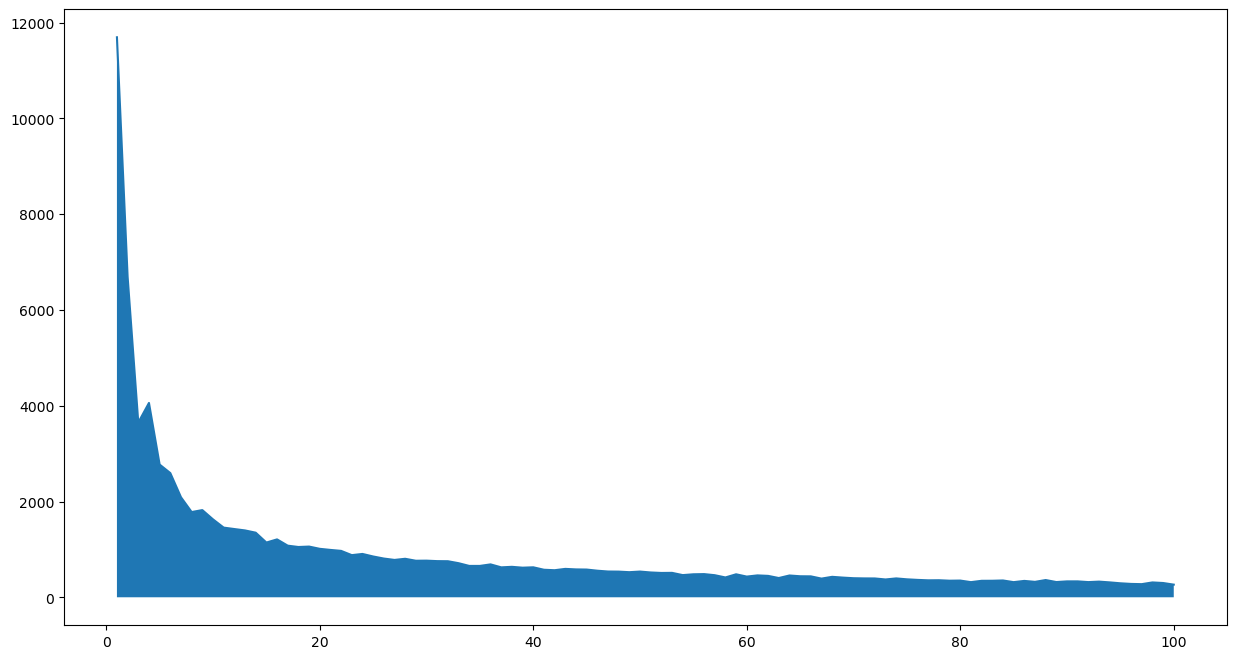

In [4]:
xs = list()
ys = list()
for x, y in sorted(scores.items(), key=lambda item: item[0]):
    xs.append(x)
    ys.append(y)

plt.figure(figsize=(15, 8))
plt.plot(xs[1:], ys[1:])
plt.fill_between(xs[1:], ys[1:])
plt.show()

In [5]:
me, re = miss_rank_error_decompose(scores, total)

print(f'Miss error: {me}')
print(f'Rank error: {re}')
print('-' * 50)
print(f'Score: {1 - me - re}')

Miss error: 0.6866725994605297
Rank error: 0.241204572904269
--------------------------------------------------
Score: 0.07212282763520128
